In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# define exact function,for test
def exact_function(x,y):
    u_xy = np.sin(np.pi * x)**2 * np.sin(np.pi * y)**2
    return u_xy

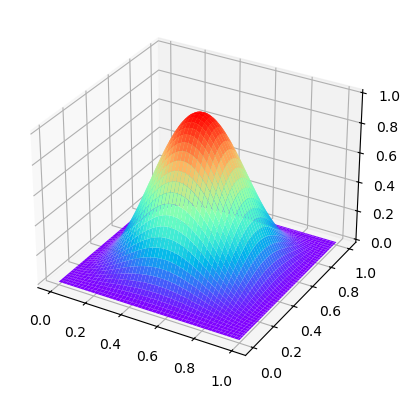

In [3]:
# test real function
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
xx,yy = np.meshgrid(x,y)
u_xy = exact_function(xx,yy)
ax3 = plt.axes(projection='3d')
ax3.plot_surface(xx,yy,u_xy,cmap='rainbow') 

In [4]:
# calculate f(x,y),the source term
def soure_term(x,y):
    f_xy = 2*np.pi**2 * (np.cos(2*np.pi*x) * np.sin(np.pi*y)**2 + np.cos(2*np.pi*y) * np.sin(np.pi*x)**2)
    return f_xy

In [5]:
# forward Euler method
def forward_euler(N1,N2,sourse_term,boundary_condition):
    # calculate stepsize
    h1 = 1/N1
    h2 = 1/N2
    # calculate C ,D,then A
    cxx = 2 * (1/h1**2 + 1/h2**2)
    cxxm = - 1/h1**2
    N = (N1 - 1) * (N2 - 1)
    CC = np.eye(N)*cxx + np.eye(N,k=-1)*cxxm + np.eye(N,k=1)*cxxm
    #print(CC)
    dxx = - 1/h2**2
    DD = np.eye(N,k=N1-1)*dxx + np.eye(N,k=1-N1)*dxx
    #print(DD)
    A =-(CC + DD)
    #print(A)
    b = sourse_term + boundary_condition
    u_vector = np.linalg.solve(A, b)# here should be changed
    print(u_vector)
    # reshape u
    u_metric = u_vector.reshape(N1-1,N2-1,order='F')
    #print(u_metric)
    return u_metric

[0.00039322 0.00053506 0.00059542 ... 0.00059542 0.00053506 0.00039322]
[[0.00039322 0.00104168 0.00174739 ... 0.00240523 0.00165216 0.00087451]
 [0.00053506 0.00116132 0.00184382 ... 0.00236231 0.00159121 0.00080808]
 [0.00059542 0.00124018 0.00193221 ... 0.00234529 0.00155775 0.0007763 ]
 ...
 [0.0007763  0.00155775 0.00234529 ... 0.00193221 0.00124018 0.00059542]
 [0.00080808 0.00159121 0.00236231 ... 0.00184382 0.00116132 0.00053506]
 [0.00087451 0.00165216 0.00240523 ... 0.00174739 0.00104168 0.00039322]]


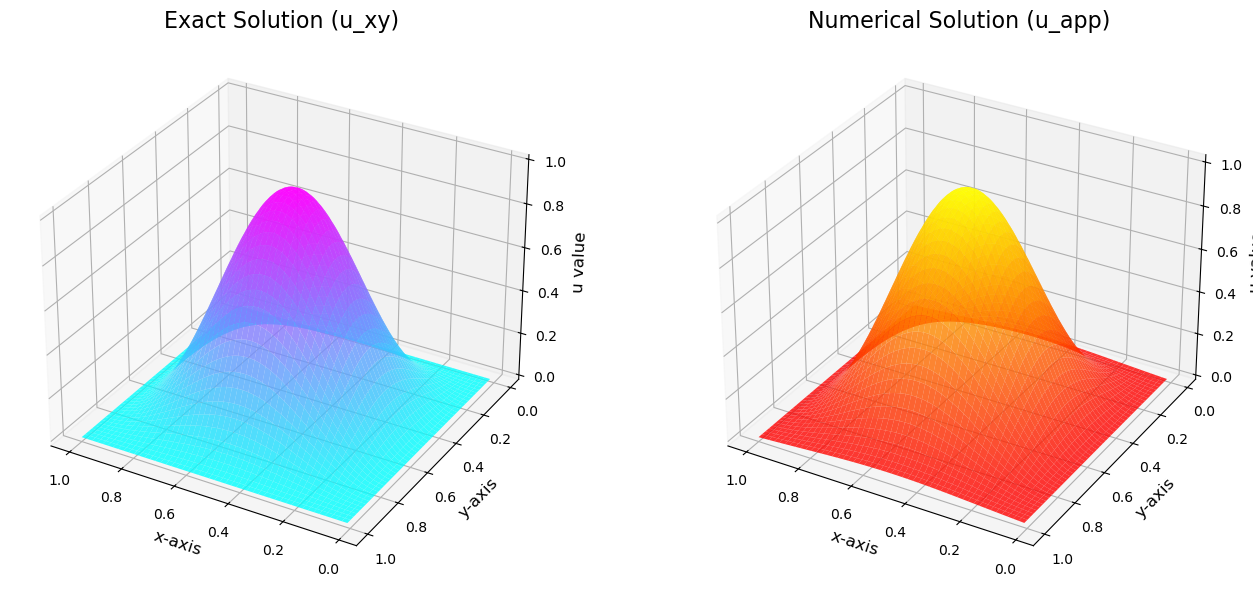

In [6]:
# test forward Euler method
N = 100
N1 = N
N2 = N
boundary_condition = np.zeros((N1-1)*(N2-1))
sourse_term = np.zeros((N1-1)*(N2-1))
h1 = 1/N1
h2 = 1/N2
for j in range(N2-1):
    for i in range(N1-1):
        sourse_term[i+j*(N1-1)] = soure_term((i+1)*h1,(j+1)*h2)
#print(sourse_term)
u_app = forward_euler(N1,N2,sourse_term,boundary_condition)
x = np.linspace(0,1,N1)
y = np.linspace(0,1,N2)
x = x[1:]
y = y[1:]
xx,yy = np.meshgrid(x,y)
u_xy = exact_function(xx,yy)
fig = plt.figure(figsize=(14, 6))  # Set figure size

# Subplot 1: Exact solution
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(xx, yy, u_xy, cmap='cool', alpha=0.8)
ax1.set_title('Exact Solution (u_xy)', fontsize=16)
ax1.set_xlabel('x-axis', fontsize=12)
ax1.set_ylabel('y-axis', fontsize=12)
ax1.set_zlabel('u value', fontsize=12)
ax1.view_init(elev=30, azim=120)

# Subplot 2: Numerical solution
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(xx, yy, u_app, cmap='autumn', alpha=0.8)
ax2.set_title('Numerical Solution (u_app)', fontsize=16)
ax2.set_xlabel('x-axis', fontsize=12)
ax2.set_ylabel('y-axis', fontsize=12)
ax2.set_zlabel('u value', fontsize=12)
ax2.view_init(elev=30, azim=120)

plt.tight_layout()
plt.show()
